In [1]:
from lib import ENIGH_Data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

In [2]:
sns.set_style("whitegrid", {"grid.linestyle":"--","axes.edgecolor":"0"})

## Figure 3-2 thesis

Figure that describe the number of people included in each classification per year

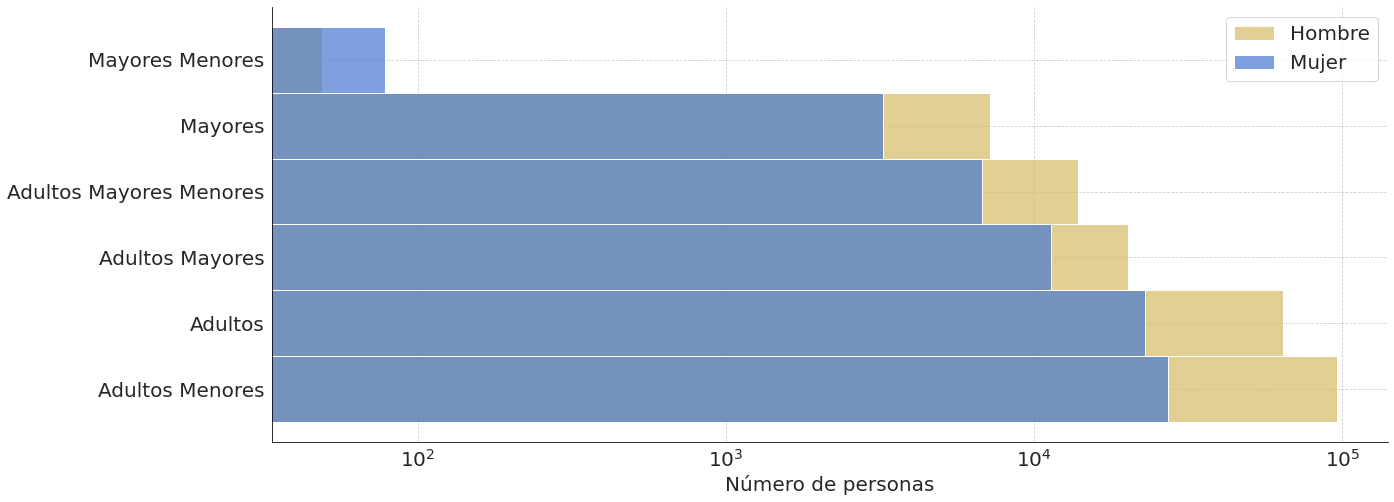

In [3]:
yr = 2020
type_class_value = "SexHHRP_Age"

ENIGH = ENIGH_Data(year=yr, clean=True, type_class=type_class_value)
ENIGH_dataset = ENIGH.classification(keep_columns=True)

ENIGH_dataset["count_node"] = ENIGH_dataset.groupby("node")["node"].transform("count")
ENIGH_dataset_sorted = ENIGH_dataset.sort_values(by=["count_node"],ignore_index=True)
ENIGH_dataset_sorted.replace({"H1":"Adultos", "M1":"Adultos",
          "H2":"Adultos Menores", "M2":"Adultos Menores",
          "H3":"Adultos Mayores", "M3":"Adultos Mayores",
          "H4":"Mayores Menores", "M4": "Mayores Menores",
          "H5":"Mayores", "M5":"Mayores",
          "H6":"Adultos Mayores Menores", "M6":"Adultos Mayores Menores"}, inplace=True)

f = plt.figure(figsize=(20, 8))
f.subplots_adjust(hspace=0.0)
fontsize_ticks = 20
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])
ax.tick_params(labelsize=fontsize_ticks)
sns.despine()
sns.set_color_codes("muted")
sns.histplot(y="node",
            data=ENIGH_dataset_sorted[ENIGH_dataset_sorted.sex_hhrp=="H"],
            color="y", label="Hombre", alpha=0.7)

sns.set_color_codes("muted")
sns.histplot(y="node",
            data=ENIGH_dataset_sorted[ENIGH_dataset_sorted.sex_hhrp=="M"],
            color="b", label="Mujer", alpha=0.7)
ax.legend(loc="best", frameon=True, fontsize=fontsize_ticks)
plt.xscale("log")
plt.xlabel("Número de personas", fontsize=fontsize_ticks)
plt.ylabel("")

plt.savefig(os.getcwd()+"/figures/NumberPeople_"+type_class_value+str(yr)+".pdf", bbox_inches="tight")

plt.show()